In [1]:
import os
import cv2
import winsound
import numpy as np
import random as rd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers 



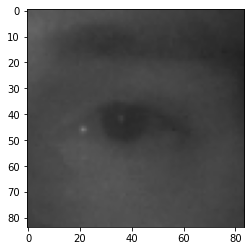

In [8]:
image = cv2.imread("Eye_Dataset/Open_Eyes/s0001_01872_0_0_1_0_0_01.png")
plt.imshow(image)


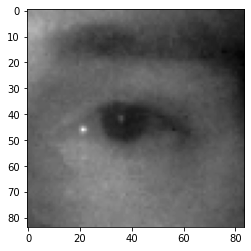

In [9]:
image = cv2.imread("Eye_Dataset/Open_Eyes/s0001_01872_0_0_1_0_0_01.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap="gray")

In [10]:
image.shape

(84, 84)

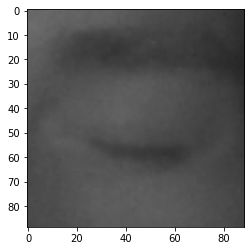

In [11]:
image = cv2.imread("Eye_Dataset/Close_Eyes/s0001_00013_0_0_0_0_0_01.png")
plt.imshow(image)

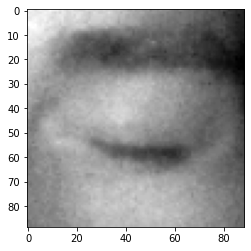

In [12]:
image = cv2.imread("Eye_Dataset/Close_Eyes/s0001_00013_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap="gray")


In [13]:
image.shape

(89, 89)

### Giving Location where the dataset is

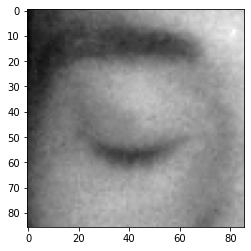

In [14]:
data_directory = "Eye_Dataset/"
classes = ["Close_Eyes", "Open_Eyes"]

for category in classes:
    loc = os.path.join(data_directory, category)
    for img in os.listdir(loc):
        images = cv2.imread(os.path.join(loc, img), cv2.IMREAD_GRAYSCALE)
        back_to_rgb = cv2.cvtColor(images, cv2.COLOR_GRAY2RGB)
        plt.imshow(images, cmap="gray")
        plt.show
        break
    break
    

In [15]:
print(images)

[[38 41 44 ... 89 89 89]
 [38 41 44 ... 92 92 91]
 [38 41 43 ... 94 93 93]
 ...
 [52 54 60 ... 78 78 80]
 [51 53 59 ... 81 81 81]
 [51 51 55 ... 80 80 82]]


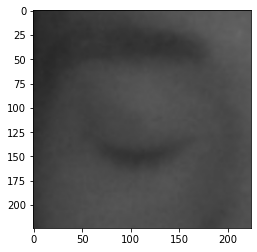

In [16]:
image_size = 224

new_image = cv2.resize(back_to_rgb, (image_size,image_size))
plt.imshow(new_image)
#plt.show()


In [17]:
print(new_image)

[[[38 38 38]
  [38 38 38]
  [39 39 39]
  ...
  [89 89 89]
  [89 89 89]
  [89 89 89]]

 [[38 38 38]
  [38 38 38]
  [39 39 39]
  ...
  [89 89 89]
  [89 89 89]
  [89 89 89]]

 [[38 38 38]
  [38 38 38]
  [39 39 39]
  ...
  [90 90 90]
  [90 90 90]
  [90 90 90]]

 ...

 [[51 51 51]
  [51 51 51]
  [51 51 51]
  ...
  [81 81 81]
  [81 81 81]
  [82 82 82]]

 [[51 51 51]
  [51 51 51]
  [51 51 51]
  ...
  [81 81 81]
  [82 82 82]
  [82 82 82]]

 [[51 51 51]
  [51 51 51]
  [51 51 51]
  ...
  [81 81 81]
  [82 82 82]
  [82 82 82]]]


In [18]:
new_image.shape

(224, 224, 3)

## Reading all the images and converting them into same size i.e. 224*244*3

In [19]:
training_img_data = []


def create_training_img_data():
    for category in classes:
        loc = os.path.join(data_directory, category)
        classes_index = classes.index(category)   ### 0 and 1
        for img in os.listdir(loc):
            try:
                images = cv2.imread(os.path.join(loc, img), cv2.IMREAD_GRAYSCALE)
                back_to_rgb = cv2.cvtColor(images, cv2.COLOR_GRAY2RGB)
                new_image = cv2.resize(back_to_rgb, (image_size,image_size))
                training_img_data.append([new_image,classes_index])
            except Exception as ex:
                pass


In [20]:
create_training_img_data()

In [21]:
print(len(training_img_data))

1672


In [28]:
classes.index("Close_Eyes")
#classes.index("Open_Eyes")



0

### Before Shuffling

In [17]:
for sample in training_img_data[:10]:
    print(sample[1])

0
0
0
0
0
0
0
0
0
0


### After Shuffling

In [18]:
rd.shuffle(training_img_data)

In [24]:
for ran_samp in training_img_data[:10]:
    print(ran_samp[1])

0
0
0
1
1
1
1
1
1
0


In [25]:
X = []
y = []

for features, label in training_img_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, image_size, image_size, 3)  ### we can fed the list in neural network so we append features in X
                                                        ### -1 means casual that means all the features can be any numbers

In [26]:
X.shape

(1672, 224, 224, 3)

### Normalizing the data

In [27]:
X = X/255.0;

In [28]:
y = np.array(y)

#### Saving normalization of features using pickle

In [29]:
import pickle as plk

pickle_out = open("X.pickle", "wb")
plk.dump(X, pickle_out)
pickle_out.close()


pickle_out = open("y.pickle", "wb")
plk.dump(y, pickle_out)
pickle_out.close()



In [7]:
###Loading Pickle
import pickle as plk

X = plk.load(open("X.pickle", "rb"))
y = plk.load(open("y.pickle", "rb"))

### Training Model Using the concept of TRANSFER LEARNING

In [31]:
model = tf.keras.applications.mobilenet.MobileNet()

In [32]:
model.summaryary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [33]:
input_data = model.layers[0].input
output_data = model.layers[-4].output


In [34]:
flatten_layer = layers.Flatten()(output_data)
final_output = layers.Dense(1)(flatten_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [38]:
new_model = keras.Model(inputs = input_data, outputs = final_output)


In [39]:
new_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

### Getting Ready for training the model

In [42]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [43]:
new_model.fit(X, y, batch_size = 32, epochs = 10, validation_split = 0.1)  ### Training the model

Epoch 1/10
47/47 [==============================] - 730s 12s/step - loss: 0.2175 - accuracy: 0.9053 - val_loss: 9.8646 - val_accuracy: 0.6012
Epoch 2/10
47/47 [==============================] - 644s 13s/step - loss: 0.0194 - accuracy: 0.9956 - val_loss: 0.2065 - val_accuracy: 0.9167
Epoch 3/10
47/47 [==============================] - 613s 13s/step - loss: 0.0056 - accuracy: 0.9998 - val_loss: 0.2531 - val_accuracy: 0.9286
Epoch 4/10
47/47 [==============================] - 634s 14s/step - loss: 0.0036 - accuracy: 0.9989 - val_loss: 0.0755 - val_accuracy: 0.9702
Epoch 5/10
47/47 [==============================] - 634s 14s/step - loss: 0.0124 - accuracy: 0.9956 - val_loss: 0.0997 - val_accuracy: 0.9524
Epoch 6/10
47/47 [==============================] - 664s 14s/step - loss: 0.0026 - accuracy: 0.9997 - val_loss: 0.0650 - val_accuracy: 0.9762
Epoch 7/10
47/47 [==============================] - 626s 13s/step - loss: 7.7571e-04 - accuracy: 1.0000 - val_loss: 0.0339 - val_accuracy: 0.9881
Ep

In [44]:
new_model.save('drowsiness_model.h5')

## For Loading the saved model

In [2]:
new_model = tf.keras.models.load_model('drowsiness_model.h5')

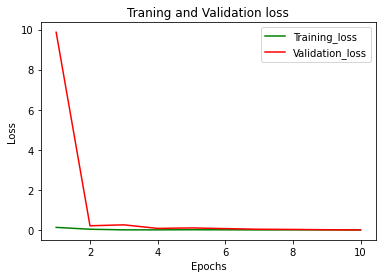

In [64]:
loss = new_model.history.history['loss']
validaiion_loss = new_model.history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label = "Training_loss")
plt.plot(epochs, validaiion_loss, 'r', label = "Validation_loss")
plt.title('Traning and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

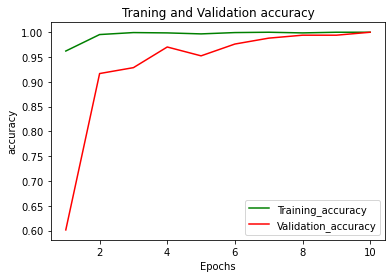

In [65]:
accuracy = new_model.history.history['accuracy']
validaiion_accuracy = new_model.history.history['val_accuracy']
plt.plot(epochs, accuracy, 'g', label = "Training_accuracy")
plt.plot(epochs, validaiion_accuracy, 'r', label = "Validation_accuracy")
plt.title('Traning and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [64]:
# Source code credit for this function: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

## Confusion Matrix within Training Set

In [65]:
from sklearn.metrics import confusion_matrix

pred = new_model.predict(X)
conf = confusion_matrix(y, pred.round(), normalize=None)

#accuracy_score(y_true, y_pred.round(), normalize=False)




In [67]:
conf

array([[979,   0],
       [  0, 693]], dtype=int64)

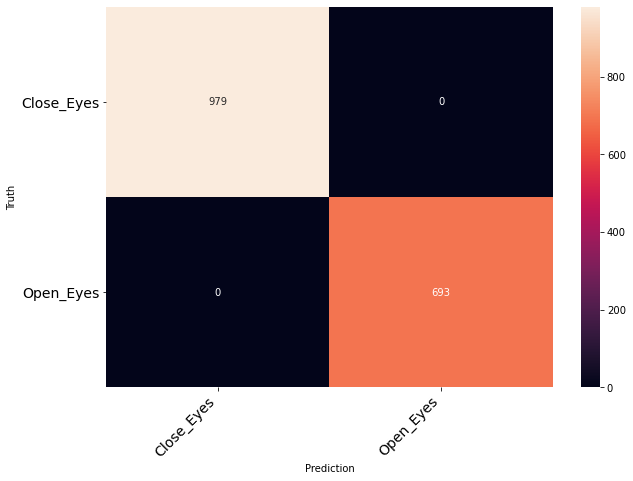

In [66]:
#cm = confusion_matrix(truth,prediction)
import pandas as pd
print_confusion_matrix(conf,["Close_Eyes","Open_Eyes"])


In [68]:
#import seaborn as sns
#sns.heatmap(conf, annot=True)

In [15]:
from sklearn.metrics import classification_report


report = classification_report(y, pred.round())
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       979
           1       1.00      1.00      1.00       693

    accuracy                           1.00      1672
   macro avg       1.00      1.00      1.00      1672
weighted avg       1.00      1.00      1.00      1672



### Testing the real data

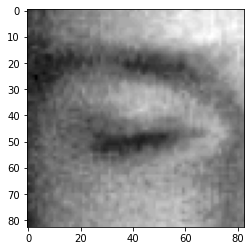

In [16]:
test_directory = "Test_Dataset/"
test_classes = ["Close_Eyes", "Open_Eyes"]

for test_category in test_classes:
    test_loc = os.path.join(test_directory, test_category)
    for test_img in os.listdir(test_loc):
        test_images = cv2.imread(os.path.join(test_loc, test_img), cv2.IMREAD_GRAYSCALE)
        test_back_to_rgb = cv2.cvtColor(test_images, cv2.COLOR_GRAY2RGB)
        plt.imshow(test_images, cmap="gray")
        plt.show
        break
    break
    

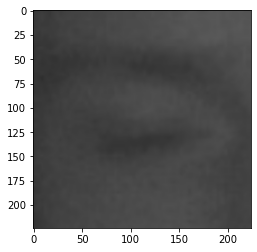

In [17]:
test_image_size = 224

test_new_image = cv2.resize(test_back_to_rgb, (test_image_size,test_image_size))
plt.imshow(test_new_image)
#plt.show()


In [18]:
test_new_image.shape

(224, 224, 3)

## Converting all the images into 224 * 224 sizes

In [23]:
test_img_data = []


def create_test_img_data():
    for test_category in test_classes:
        test_loc = os.path.join(test_directory, test_category)
        test_classes_index = test_classes.index(test_category)   ### 0 and 1
        for test_img in os.listdir(test_loc):
            try:
                test_images = cv2.imread(os.path.join(test_loc, test_img), cv2.IMREAD_GRAYSCALE)
                test_back_to_rgb = cv2.cvtColor(test_images, cv2.COLOR_GRAY2RGB)
                test_new_image = cv2.resize(test_back_to_rgb, (test_image_size,test_image_size))
                test_img_data.append([test_new_image,test_classes_index])
            except Exception as ex:
                pass


In [24]:
create_test_img_data()

In [26]:
print(len(test_img_data))

500


In [27]:
for test_sample in test_img_data[:10]:
    print(test_sample[1])

0
0
0
0
0
0
0
0
0
0


In [47]:
#rd.shuffle(test_img_data)

In [48]:
test_X = []
test_y = []

for test_features, test_label in test_img_data:
    test_X.append(test_features)
    test_y.append(test_label)
    
test_X = np.array(test_X).reshape(-1, test_image_size, test_image_size, 3) ### we can fed the list in neural network so we append features in X
                                                        ### -1 means casual that means all the features can be any numbers

In [49]:
test_X.shape

(500, 224, 224, 3)

In [50]:
test_X = test_X/255.0;

In [51]:
test_y = np.array(test_y)

## Saving Normalization in pickle

In [33]:
import pickle as plk

test_pickle_out = open("test_X.pickle", "wb")
plk.dump(test_X, test_pickle_out)
test_pickle_out.close()


test_pickle_out = open("test_y.pickle", "wb")
plk.dump(test_y, test_pickle_out)
test_pickle_out.close()



In [ ]:
###Loading Pickle
#import pickle as plk

#test_X = plk.load(open("test_X.pickle", "rb"))
#test_y = plk.load(open("test_y.pickle", "rb"))

### Now Predicting

In [52]:
test_loss, test_acc = new_model.evaluate(test_X, test_y, steps=25)
print('test acc:', test_acc)
print('test loss:', test_loss)

25/25 [==============================] - 31s 872ms/step - loss: 0.5390 - accuracy: 0.8960
test acc: 0.8960000276565552
test loss: 0.5389835238456726


In [57]:
# Source code credit for this function: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

### Confusion Matrix with Test Data 

In [53]:
from sklearn.metrics import confusion_matrix

test_pred = new_model.predict(test_X)
test_conf = confusion_matrix(test_y, test_pred.round(), normalize=None)

#accuracy_score(y_true, y_pred.round(), normalize=False)




In [61]:
test_conf

array([[226,  24],
       [ 28, 222]], dtype=int64)

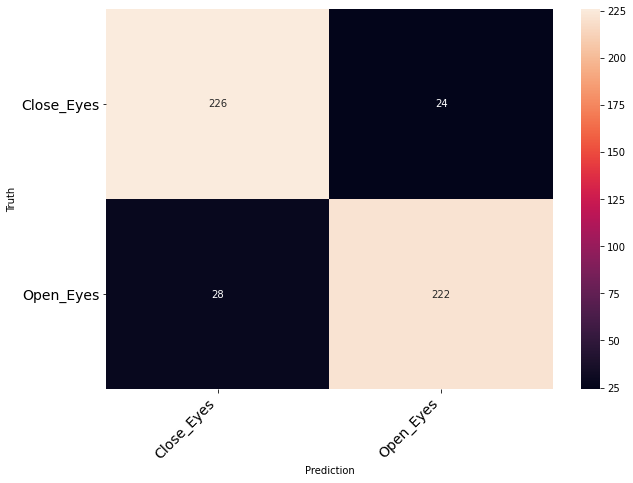

In [59]:
#cm = confusion_matrix(truth,prediction)
import pandas as pd
print_confusion_matrix(test_conf,["Close_Eyes","Open_Eyes"])


In [60]:
#import seaborn as sns
#sns.heatmap(test_conf, annot=True)

In [70]:
from sklearn.metrics import classification_report


report = classification_report(test_y, test_pred.round())
print(report)

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       250
           1       0.90      0.89      0.90       250

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500



### Checking the Predictions


In [3]:
image_size = 224
image_array = cv2.imread('s0014_00003_0_0_0_0_0_01.png', cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(image_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (image_size,image_size))


In [4]:
X_input = np.array(new_array).reshape(1, image_size, image_size, 3)
X_input.shape

(1, 224, 224, 3)

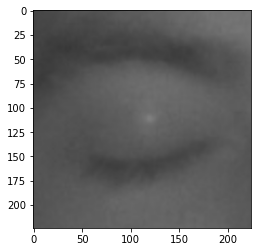

In [5]:
plt.imshow(new_array)

In [6]:
X_input = X_input/255.0

In [7]:
prediction = new_model.predict(X_input)
prediction

array([[2.1247706e-06]], dtype=float32)

In [8]:
if prediction>=0.5:
    print('Open Eyes')
else:
    print('Close Eyes')


Close Eyes


In [9]:
image_array = cv2.imread('s0029_00279_0_0_1_0_1_01.png', cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(image_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (image_size,image_size))

In [10]:
X_input = np.array(new_array).reshape(1, image_size, image_size, 3)
X_input.shape

(1, 224, 224, 3)

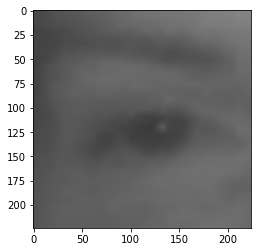

In [11]:
plt.imshow(new_array)

In [12]:
X_input = X_input/255.0

In [13]:
prediction = new_model.predict(X_input)
prediction

array([[0.99993694]], dtype=float32)

In [14]:
if prediction>=0.5:
    print('Open Eyes')
else:
    print('Close Eyes')

Open Eyes


### Now Checking for outside images

In [15]:
outside_image = cv2.imread('eyeopenman.jpg')

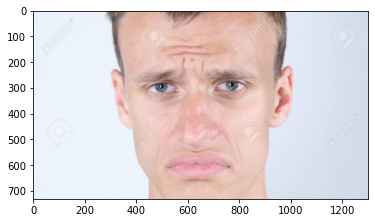

In [16]:
plt.imshow(cv2.cvtColor(outside_image, cv2.COLOR_BGR2RGB))

In [17]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [18]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [19]:
gray = cv2.cvtColor(outside_image, cv2.COLOR_BGR2GRAY)
#face = face_cascade.detectMultiScale(gray, 1.1, 4)

In [20]:
#eyes = eye_cascade.detectMultiScale(gray,1.1,4)

In [21]:
face = face_cascade.detectMultiScale(gray, 1.1, 4)

In [22]:
for(x, y, w, h) in face:
    cv2.rectangle(outside_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = outside_image[y:y+h, x:x+w]
    
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey),(ex+ew,ey+eh),(0, 255, 0), 2)
    

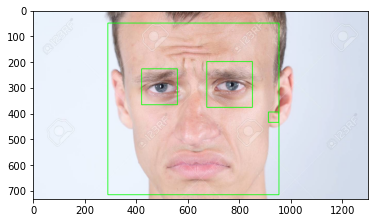

In [23]:
plt.imshow(cv2.cvtColor(outside_image, cv2.COLOR_BGR2RGB))

In [24]:
if len(eyes) == 0:
    print("Eyes not detected")
else:
    for (ex,ey,ew,eh) in eyes:
        eyes_roi = roi_color[ey: ey+eh, ex: ex+ew]

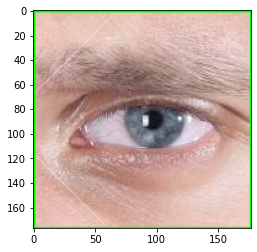

In [25]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [26]:
eyes_roi.shape

(177, 177, 3)

### Resizing images according to model

In [27]:
final_image = cv2.resize(eyes_roi, (224,224))
final_image = np.expand_dims(final_image,axis = 0)    ### Need Fourth Dimension
final_image = final_image/255.0   ### Normalizing the image

In [28]:
final_image.shape

(1, 224, 224, 3)

In [29]:
new_model.predict(final_image)

array([[0.8709104]], dtype=float32)

In [30]:
if new_model.predict(final_image) >= 0.5:
    print("Open Eye")
else:
    print("Close Eye")

Open Eye


## For CLose Eyes

In [31]:
close_eye = cv2.imread('eyecloseman.jpg')

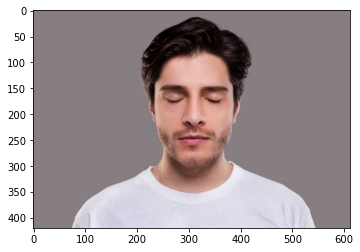

In [32]:
plt.imshow(cv2.cvtColor(close_eye, cv2.COLOR_BGR2RGB))

In [33]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [34]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [35]:
gray = cv2.cvtColor(close_eye, cv2.COLOR_BGR2GRAY)

In [36]:
face = face_cascade.detectMultiScale(gray, 1.1, 4)

In [37]:
for(x, y, w, h) in face:
    cv2.rectangle(close_eye, (x, y), (x+w, y+h), (0, 255, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = close_eye[y:y+h, x:x+w]
    
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey),(ex+ew,ey+eh),(0, 255, 0), 2)
    

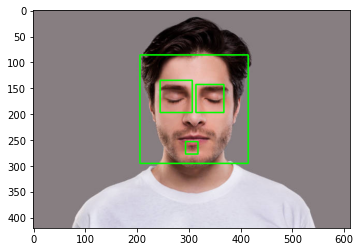

In [38]:
plt.imshow(cv2.cvtColor(close_eye, cv2.COLOR_BGR2RGB))

In [39]:
if len(eyes) == 0:
    print("Eyes not detected")
else:
    for (ex,ey,ew,eh) in eyes:
        eyes_roi = roi_color[ey: ey+eh, ex: ex+ew]

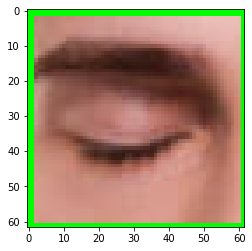

In [40]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [41]:
eyes_roi.shape

(62, 62, 3)

### Resizing according to model

In [42]:
final_image = cv2.resize(eyes_roi, (224,224))
final_image = np.expand_dims(final_image,axis = 0)    ### Need Fourth Dimension
final_image = final_image/255.0   ### Normalizing the image

In [43]:
final_image.shape

(1, 224, 224, 3)

In [44]:
new_model.predict(final_image)

array([[0.04210716]], dtype=float32)

In [45]:
if new_model.predict(final_image) >= 0.5:
    print("Open Eye")
else:
    print("Close Eye")

Close Eye


### Checking on real time

In [53]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')


capture = cv2.VideoCapture(1)
#### Will Check wjether the webcam will open or not
if not capture.isOpened():
    capture = cv2.VideoCapture(0)
if not capture.isOpened():
    raise IOError("Unable to open webcam")
    
while True:
    ret,frame = capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    face = face_cascade.detectMultiScale(gray, 1.1, 4)
    for(x, y, w, h) in face:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
    
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for(ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex,ey),(ex+ew,ey+eh),(0, 255, 0), 2)
            if len(eyes) == 0:
                print("Eyes not detected")
            else:
                for (ex,ey,ew,eh) in eyes:
                    eyes_roi = roi_color[ey: ey+eh, ex: ex+ew]
    
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image,axis = 0) ## Here needed 4th dimension
    final_image = final_image/255.0
    
    
    predictions = new_model.predict(final_image)
    if (predictions >= 0.5):
        status = "Open Eyes"
    else:
        status = "Close Eyes"
    
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    ### Use putText() function for inserting text on video
    cv2.putText(frame, status, (50, 50), font, 3, (0, 0, 255), 2, cv2.LINE_4)
    cv2.imshow('Drowsiness Detection', frame)
    
    ### For exitting the windows
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
capture.release()
cv2.destroyAllWindows()
    

### Adding alarm Functionalities

In [7]:
import winsound
frequency = 1500
duration = 2000


face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')


capture = cv2.VideoCapture(1)
#### Will Check wjether the webcam will open or not
if not capture.isOpened():
    capture = cv2.VideoCapture(0)
if not capture.isOpened():
    raise IOError("Unable to open webcam")
    
counter = 10
msg = "Counter: "
    
while True:
    ret,frame = capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    face = face_cascade.detectMultiScale(gray, 1.1, 4)
    for(x, y, w, h) in face:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
    
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for(ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex,ey),(ex+ew,ey+eh),(0, 255, 0), 2)
            if len(eyes) == 0:
                print("Eyes not detected")
            else:
                for (ex,ey,ew,eh) in eyes:
                    eyes_roi = roi_color[ey: ey+eh, ex: ex+ew]
    
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image,axis = 0) ## Here needed 4th dimension
    final_image = final_image/255.0
    
    predictions = new_model.predict(final_image)
    if (predictions >= 0.5):
        if counter > 0:
            counter = 10
        
        status = "Open Eyes"
        
        x1,y1,w1,h1 = 0,0,175,75
        
        ## Draw Black rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 +h1), (0,0,0), -1)
         ### Adding Text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
        
        
    else:
        counter = counter - 1
        cv2.putText(frame, msg + "" + str(counter), (280, 470), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_8)
        
        status = "Close Eyes"
        
        ## Draw a background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        ## Adding Text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
        if counter == 0:
            x1,y1,w1,h1 = 0,0,175,75
            ##Adding Text
            cv2.putText(frame, 'Alert Alert!!', (100, 80), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 0, 255), 2, cv2.LINE_8)
            
            winsound.Beep(frequency, duration)
            counter = 10
    cv2.imshow('Drowsiness Detection', frame)
    
    ### For exitting the windows
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

capture.release()
cv2.destroyAllWindows() 


In [8]:
#import winsound
frequency = 1500
duration = 2000


face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')


capture = cv2.VideoCapture("manblinking.mp4")

    
#counter = 10
#msg = "Counter: "
    
while True:
    ret,frame = capture.read()
    frame = cv2.resize(frame, (600, 500))

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    face = face_cascade.detectMultiScale(gray, 1.1, 4)
    for(x, y, w, h) in face:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
    
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for(ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex,ey),(ex+ew,ey+eh),(0, 255, 0), 2)
            if len(eyes) == 0:
                print("Eyes not detected")
            else:
                for (ex,ey,ew,eh) in eyes:
                    eyes_roi = roi_color[ey: ey+eh, ex: ex+ew]
    
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image,axis = 0) ## Here needed 4th dimension
    final_image = final_image/255.0
    
    predictions = new_model.predict(final_image)
    if (predictions >= 0.5):
       
        
        status = "Open Eyes"
        
        x1,y1,w1,h1 = 0,0,175,75
        
        ## Draw Black rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 +h1), (0,0,0), -1)
         ### Adding Text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
        
        
    else:
        #cv2.putText(frame, msg + "" + str(counter), (280, 470), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_8)
        
        status = "Close Eyes"
        
        ## Draw a background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        ## Adding Text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
        #if counter == 0:
        x1,y1,w1,h1 = 0,0,175,75
        ##Adding Text
        #cv2.putText(frame, 'Alert Alert!!', (100, 80), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 0, 255), 2, cv2.LINE_8)
            
        #winsound.Beep(frequency, duration)
            #counter = 10
    cv2.imshow('Drowsiness Detection', frame)
    
    ### For exitting the windows
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

capture.release()
cv2.destroyAllWindows() 


In [23]:
capture = cv2.VideoCapture("eyetesting.mp4")

while True:
    ret,frame = capture.read()
    
    cv2.imshow("Video", frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

capture.release()
cv2.destroyAllWindows() 
    
